In [1]:
import numpy as np
import pandas as pd
import nbimporter
import dynamicalModels as dynamicalModels
import statsmodels.api as sm
from statsmodels.tsa.api import VAR, DynamicVAR
from statsmodels.tsa.tsatools import detrend
import statsmodels
import matplotlib.pyplot as plt


import scipy.fftpack as fftpack
from scipy.signal import csd

Importing Jupyter notebook from dynamicalModels.ipynb


# Van der Pool Oscillator

In [192]:
x0 = np.array([5.0, 5.0])
dt = 0.1
tinit = 0
tmax = 100
vdp = dynamicalModels.van_der_pol(2)

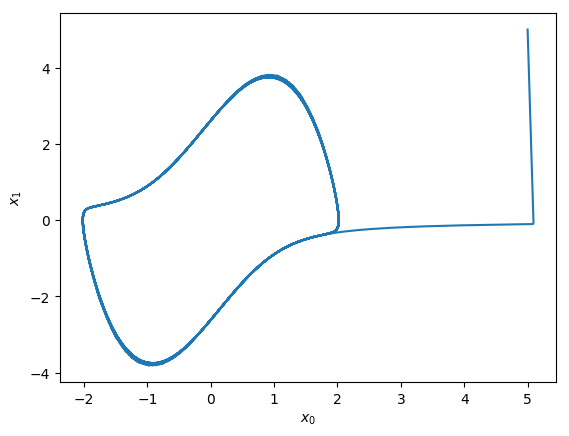

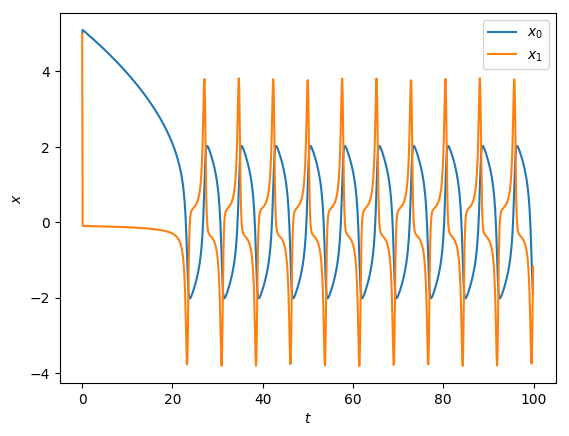

In [193]:
sol = vdp.integrate(tinit,tmax,dt,x0)
data_length =(sol.t).shape
vdp.trajectory_plot()
vdp.evolution_plot()

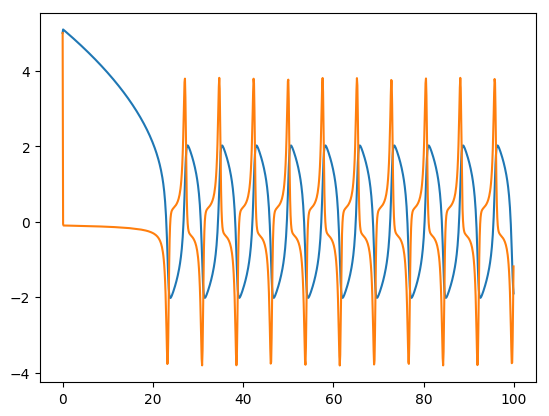

In [195]:
plt.plot(sol.t,(sol.y).T)
plt.show()

In [196]:
vdp_df = pd.DataFrame(data=(sol.y).T,    
                columns=['x','dx'])

#detrend 
vdp_df = vdp_df.diff()
vdp_df = vdp_df.dropna()

model = VAR(vdp_df)

#find optimal lag order by information criteria
lag_orders_data = model.select_order(trend='nc')
print(lag_orders_data.selected_orders)

{'aic': 21, 'bic': 12, 'hqic': 17, 'fpe': 21}


/usr/local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [248]:
#fit to optimal BIC lag number
#results = model.fit(lag_orders_data.selected_orders['aic'],trend='nc')
#print(results.summary())

# time lag of 28 fits the trend of spectral density calculated via Welch's method
# Check if there are better estimates of spectral density besides Welch's method
results = model.fit(28,trend='nc')

In [249]:
Sigma = np.cov((results.resid.values).T)

[[4.86279997e-07 1.33340845e-05]
 [1.33340845e-05 3.73233367e-04]]


In [250]:
def transfer_fun(f):
    coeffs_length = (results.coefs).shape[0]
    seq_nums = np.array(range(1,coeffs_length+1))
    exponential = np.exp(-2*np.pi*1j*seq_nums*f)
    ident_mat = np.eye(results.coefs[0,:,:].shape[0])
    transfer_mat = np.linalg.inv(ident_mat - np.einsum('ijk,i',results.coefs,exponential))
    return np.matrix(transfer_mat)

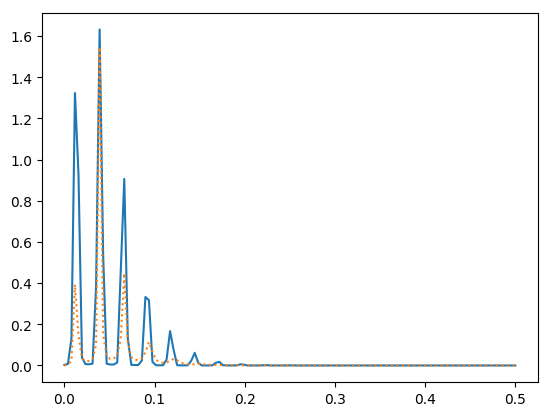

In [252]:
plt.clf()
vdp_csd_welch = csd(vdp_df['x'],vdp_df['dx'])
estimate_csd = []
for f in vdp_csd_welch[0]:
    H_f= transfer_fun(f)
    est_S = H_f.dot(Sigma).dot(H_f.H)
    estimate_csd.append(est_S[0,1])
csd_estimate_transfer = np.absolute(np.array(estimate_csd))
csd_estimate_welch = np.absolute(vdp_csd_welch[1])

plt.plot(wiener_csd_welch[0],csd_estimate_welch)
plt.plot(wiener_csd_welch[0],csd_estimate_transfer,':')
plt.show()

# Van der Pool with noise added to the dynamical  data

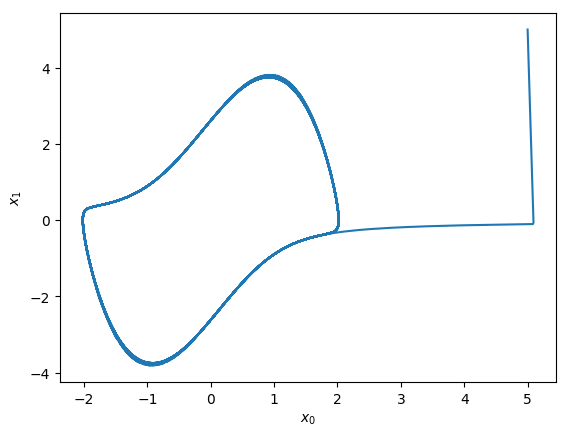

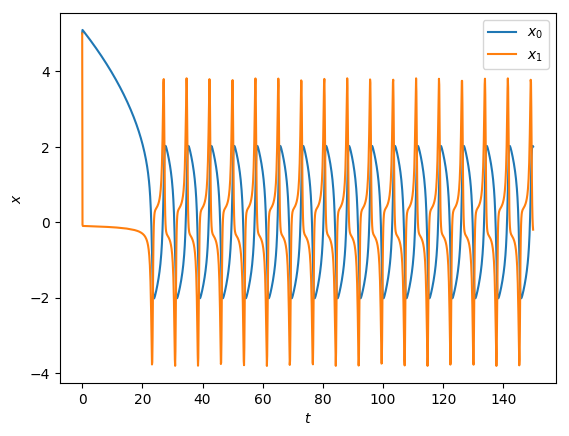

In [288]:
x0 = np.array([5.0, 5.0])
dt = 0.1
tinit = 0
tmax = 150
vdp = dynamicalModels.van_der_pol(2)

sol = vdp.integrate(tinit,tmax,dt,x0)
data_length =(sol.t).shape
vdp.trajectory_plot()
vdp.evolution_plot()

In [289]:
length_vdp = sol.y[0,:].shape[0]
y = sol.y
y[0,:] = sol.y[0,:] + np.random.normal(scale=0.1,size=length_vdp)
y[1,:] = sol.y[1,:] = sol.y[1,:] + np.random.normal(scale=0.1,size=length_vdp)

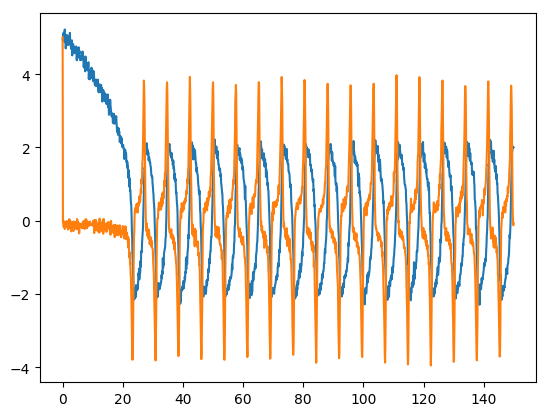

In [290]:
plt.plot(sol.t,y.T)
plt.show()

In [291]:
vdp_df = pd.DataFrame(data=y.T,    
                columns=['x','dx'])

#detrend 
vdp_df = vdp_df.diff()
vdp_df = vdp_df.dropna()

model = VAR(vdp_df)

#find optimal lag order by information criteria
lag_orders_data = model.select_order(trend='nc')
print(lag_orders_data.selected_orders)

{'aic': 24, 'bic': 12, 'hqic': 24, 'fpe': 24}


/usr/local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [298]:
#fit to optimal BIC lag number
#results = model.fit(lag_orders_data.selected_orders['aic'],trend='nc')
#print(results.summary())

# time lag of 28 fits the trend of spectral density calculated via Welch's method
# Check if there are better estimates of spectral density besides Welch's method
results = model.fit(32,trend='nc')

In [299]:
Sigma = np.cov((results.resid.values).T)
print(Sigma)
def transfer_fun(f):
    coeffs_length = (results.coefs).shape[0]
    seq_nums = np.array(range(1,coeffs_length+1))
    exponential = np.exp(-2*np.pi*1j*seq_nums*f)
    ident_mat = np.eye(results.coefs[0,:,:].shape[0])
    transfer_mat = np.linalg.inv(ident_mat - np.einsum('ijk,i',results.coefs,exponential))
    return np.matrix(transfer_mat)

[[0.01184389 0.00355944]
 [0.00355944 0.03975396]]


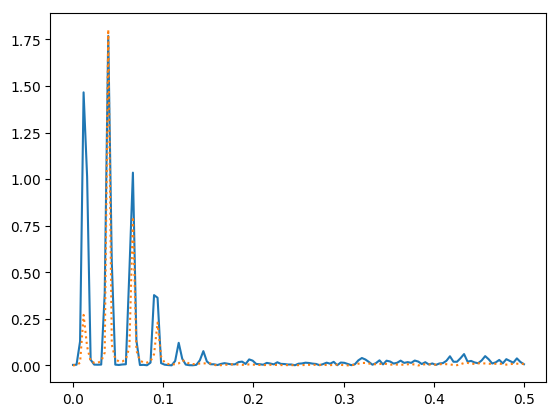

In [300]:
plt.clf()
vdp_csd_welch = csd(vdp_df['x'],vdp_df['dx'])
estimate_csd = []
for f in vdp_csd_welch[0]:
    H_f= transfer_fun(f)
    est_S = H_f.dot(Sigma).dot(H_f.H)
    estimate_csd.append(est_S[0,1])
csd_estimate_transfer = np.absolute(np.array(estimate_csd))
csd_estimate_welch = np.absolute(vdp_csd_welch[1])

plt.plot(wiener_csd_welch[0],csd_estimate_welch)
plt.plot(wiener_csd_welch[0],csd_estimate_transfer,':')
plt.show()